In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_aus = pd.read_csv('aus.csv', parse_dates=['date'], dayfirst=True)
df_usa = pd.read_csv('usa.csv', parse_dates=['date'], dayfirst=True)
df_bris = pd.read_csv('brisbane.csv', parse_dates=['date'], dayfirst=True)

display(df_aus.head(), df_usa.head(), df_bris.head())

,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7
2,2002-01-20,31.2
3,2003-01-20,30.5
4,2004-01-20,31.5


,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77
2,2001-03-01,15.98
3,2001-09-01,16.55
4,2002-03-01,15.32


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31
2,2000-01-15,30.99
3,2000-01-22,30.94
4,2000-01-29,29.95


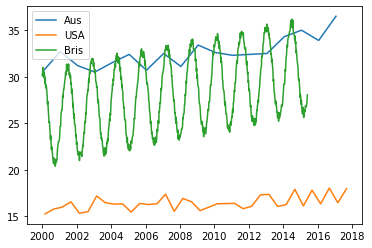

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(df_aus.date, df_aus.temperature, label='Aus')
plt.plot(df_usa.date, df_usa.temperature, label='USA')
plt.plot(df_bris.date, df_bris.temperature, label='Bris')
plt.legend();

## Ordered merging

In [4]:
pd.merge(df_aus, df_usa, on='date', how='outer')

,date,temperature_x,temperature_y
0,2000-01-20,30.6,NaN
1,2001-01-20,32.7,NaN
2,2002-01-20,31.2,NaN
3,2003-01-20,30.5,NaN
4,2004-01-20,31.5,NaN
5,2005-01-20,32.4,NaN
6,2006-01-20,30.7,NaN
7,2007-01-20,32.5,NaN
8,2008-01-20,31.1,NaN
9,2009-01-20,33.4,NaN


In [5]:
pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa')).head(10)

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,NaN,15.25
2,2000-09-01,NaN,15.77
3,2001-01-20,32.7,NaN
4,2001-03-01,NaN,15.98
5,2001-09-01,NaN,16.55
6,2002-01-20,31.2,NaN
7,2002-03-01,NaN,15.32
8,2002-09-01,NaN,15.50
9,2003-01-20,30.5,NaN


In [6]:
pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa'), fill_method='ffill')

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,30.6,15.25
2,2000-09-01,30.6,15.77
3,2001-01-20,32.7,15.77
4,2001-03-01,32.7,15.98
5,2001-09-01,32.7,16.55
6,2002-01-20,31.2,16.55
7,2002-03-01,31.2,15.32
8,2002-09-01,31.2,15.50
9,2003-01-20,30.5,15.50


## Merging with partial/closest matches

In [7]:
df_both = pd.merge_ordered(df_aus, df_usa, on='date', suffixes=('_aus', '_usa'), fill_method='ffill')
df_all = pd.merge_asof(df_both, df_bris, on='date').rename(columns={'temperature': 'temperature_bris'})

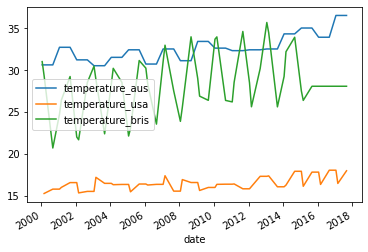

In [8]:
df_all.plot('date', ['temperature_aus', 'temperature_usa', 'temperature_bris']);

This has allowed us to pick out the dates corresponding to other measurements, which in this case correspond to the middle of summer and winter. Notice the fill value on the right. We could remove that if we wanted.

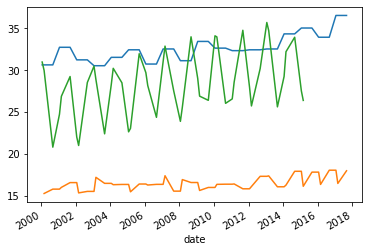

In [9]:
df_tmp = pd.merge_asof(df_both, df_bris, on='date', 
                       tolerance=pd.Timedelta('14 days'), direction='nearest')
df_tmp.plot('date', df_tmp.columns[1:], legend=False);